In [1]:
#Importing important libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

In [2]:
#Importing DATASET
df=pd.read_excel(r"C:\Users\91879\OneDrive\Desktop\MaxLife_Data [Case study].xlsx")
df

,checkin_acc,duration,credit_history,purpose,amount,svaing_acc,present_emp_since,inst_rate,personal_status,other_debtors,...,property,age,inst_plans,housing,num_credits,job,dependents,telephone,foreign_worker,status
0,A11,9,A34,A43,1754,A65,A75,6,A93,A101,...,A121,101,A143,A152,3,A173,2,A192,A201,1
1,A12,72,A32,A43,8927,A61,A73,3,A92,A101,...,A121,33,A143,A152,2,A173,2,A191,A201,2
2,A14,18,A34,A46,3144,A61,A74,3,A93,A101,...,A121,74,A143,A152,2,A172,3,A191,A201,1
3,A11,63,A32,A42,11823,A61,A74,3,A93,A103,...,A122,68,A143,A153,2,A173,3,A191,A201,1
4,A11,36,A33,A40,7305,A61,A73,5,A93,A101,...,A124,80,A143,A153,3,A173,3,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,18,A32,A42,2604,A61,A74,5,A92,A101,...,A121,47,A143,A152,2,A172,2,A191,A201,1
996,A11,45,A32,A41,5786,A61,A73,6,A91,A101,...,A122,60,A143,A152,2,A174,2,A192,A201,1
997,A14,18,A32,A43,1206,A61,A75,6,A93,A101,...,A123,57,A143,A152,2,A173,2,A191,A201,1
998,A11,68,A32,A43,2768,A61,A73,6,A93,A101,...,A124,35,A143,A153,2,A173,2,A192,A201,2


# Define Data

In [3]:
df["checkin_acc"]=df["checkin_acc"].map({"A11": "..< 0 DM","A12" : "0 <= ... < 200 DM","A13" :" ..>= 200 DM / salary assignments for at least 1 year","A14" : "no checking account"})
df["credit_history"]=df["credit_history"].map({"A30" : "no credits taken/all credits paid back duly","A31" : "all credits at this bank paid back duly","A32" : "existing credits paid back duly till now","A33" : "delay in paying off in the past","A34" : "critical account/other credits existing (not at this bank)"})

Purpose={"A40" : "car (new)", "A41" : "car (used)", "A42" : "furniture/equipment", "A43" :"radio/television" , "A44" : "domestic appliances", "A45" : "repairs", "A46" : "education", 'A47' : 'vacation','A48' : 'retraining','A49' : 'business','A410' : 'others'}
df["purpose"]=df["purpose"].map(Purpose)

Saving_account={"A65" : "no savings account","A61" :"<100 DM","A62" : "100 <= <500 DM","A63" :"500 <= < 1000 DM", "A64" :">= 1000 DM"}
df["svaing_acc"]=df["svaing_acc"].map(Saving_account)

Present_employment={'A75':">=7 years", 'A74':"4<= <7 years",  'A73':"1<= < 4 years", 'A72':"<1 years",'A71':"unemployed"}
df["present_emp_since"]=df["present_emp_since"].map(Present_employment)

Personal_status_and_sex={ 'A95':"female:single",'A94':"male:married/widowed",'A93':"male:single", 'A92':"female:divorced/separated/married", 'A91':"male:divorced/separated"}
df["personal_status"]=df["personal_status"].map(Personal_status_and_sex)


Other_debtors_guarantors={'A101':"none", 'A102':"co-applicant", 'A103':"guarantor"}
df["other_debtors"]=df["other_debtors"].map(Other_debtors_guarantors)


Property={'A121':"real estate", 'A122':"savings agreement/life insurance", 'A123':"car or other", 'A124':"unknown / no property"}
df["property"]=df["property"].map(Property)

Other_installment_plans={'A143':"none", 'A142':"store", 'A141':"bank"}
df["inst_plans"]=df["inst_plans"].map(Other_installment_plans)

Housing={'A153':"for free", 'A152':"own", 'A151':"rent"}
df["housing"]=df["housing"].map(Housing)

df["residing_since"]=df["residing_since"].map({2:1,3:2,5:3,6:4})

Job={'A174':"management/ highly qualified employee", 'A173':"skilled employee / official", 'A172':"unskilled - resident", 'A171':"unemployed/ unskilled  - non-resident"}
df["job"]=df["job"].map(Job)

Telephone={'A192':"yes", 'A191':"none"}
df["telephone"]=df["telephone"].map(Telephone)



foreign_worker={'A201':"yes", 'A202':"no"}
df["foreign_worker"]=df["foreign_worker"].map(foreign_worker)



status={1:"Good", 2:"Bad"}
df["status"]=df["status"].map(status)

df["num_credits"]=df["num_credits"].map({2:1,3:2,5:3,6:4})

In [4]:
df

,checkin_acc,duration,credit_history,purpose,amount,svaing_acc,present_emp_since,inst_rate,personal_status,other_debtors,...,property,age,inst_plans,housing,num_credits,job,dependents,telephone,foreign_worker,status
0,..< 0 DM,9,critical account/other credits existing (not a...,radio/television,1754,no savings account,>=7 years,6,male:single,none,...,real estate,101,none,own,2,skilled employee / official,2,yes,yes,Good
1,0 <= ... < 200 DM,72,existing credits paid back duly till now,radio/television,8927,<100 DM,1<= < 4 years,3,female:divorced/separated/married,none,...,real estate,33,none,own,1,skilled employee / official,2,none,yes,Bad
2,no checking account,18,critical account/other credits existing (not a...,education,3144,<100 DM,4<= <7 years,3,male:single,none,...,real estate,74,none,own,1,unskilled - resident,3,none,yes,Good
3,..< 0 DM,63,existing credits paid back duly till now,furniture/equipment,11823,<100 DM,4<= <7 years,3,male:single,guarantor,...,savings agreement/life insurance,68,none,for free,1,skilled employee / official,3,none,yes,Good
4,..< 0 DM,36,delay in paying off in the past,car (new),7305,<100 DM,1<= < 4 years,5,male:single,none,...,unknown / no property,80,none,for free,2,skilled employee / official,3,none,yes,Bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking account,18,existing credits paid back duly till now,furniture/equipment,2604,<100 DM,4<= <7 years,5,female:divorced/separated/married,none,...,real estate,47,none,own,1,unskilled - resident,2,none,yes,Good
996,..< 0 DM,45,existing credits paid back duly till now,car (used),5786,<100 DM,1<= < 4 years,6,male:divorced/separated,none,...,savings agreement/life insurance,60,none,own,1,management/ highly qualified employee,2,yes,yes,Good
997,no checking account,18,existing credits paid back duly till now,radio/television,1206,<100 DM,>=7 years,6,male:single,none,...,car or other,57,none,own,1,skilled employee / official,2,none,yes,Good
998,..< 0 DM,68,existing credits paid back duly till now,radio/television,2768,<100 DM,1<= < 4 years,6,male:single,none,...,unknown / no property,35,none,for free,1,skilled employee / official,2,yes,yes,Bad


# EDA (Exploratory Data Analysis)

In [5]:
df.isnull().sum()

checkin_acc          0
duration             0
credit_history       0
purpose              0
amount               0
svaing_acc           0
present_emp_since    0
inst_rate            0
personal_status      0
other_debtors        0
residing_since       0
property             0
age                  0
inst_plans           0
housing              0
num_credits          0
job                  0
dependents           0
telephone            0
foreign_worker       0
status               0
dtype: int64

In data there is no null values

In [6]:
df["checkin_acc"].value_counts(normalize=True).mul(100)

no checking account                                      39.4
..< 0 DM                                                 27.4
0 <= ... < 200 DM                                        26.9
 ..>= 200 DM / salary assignments for at least 1 year     6.3
Name: checkin_acc, dtype: float64

Status of existing checking account :
1) no checking account 
2) < 0 DM 
3) > 0 DM

In [7]:
df["checkin_acc"]=df["checkin_acc"].map({" ..>= 200 DM / salary assignments for at least 1 year":"> 0 DM","0 <= ... < 200 DM":"> 0 DM","no checking account":"no checking account","..< 0 DM":"< 0 DM"})

In [8]:
df["checkin_acc"].value_counts(normalize=True).mul(100)

no checking account    39.4
> 0 DM                 33.2
< 0 DM                 27.4
Name: checkin_acc, dtype: float64

In [9]:
df["credit_history"].value_counts(normalize=True).mul(100)

existing credits paid back duly till now                      53.0
critical account/other credits existing (not at this bank)    29.3
delay in paying off in the past                                8.8
all credits at this bank paid back duly                        4.9
no credits taken/all credits paid back duly                    4.0
Name: credit_history, dtype: float64

Credit history: 
1) all credit / existing credits paid back duly till now 
2) no credits taken 
3) critical account/delay in paying off

In [10]:
df["credit_history"]=df["credit_history"].map({"existing credits paid back duly till now":"all credit / existing credits paid back duly till now","all credits at this bank paid back duly":"all credit / existing credits paid back duly till now","no credits taken/all credits paid back duly":"no credit taken","critical account/other credits existing (not at this bank)":"critical account/delay in paying off","delay in paying off in the past":"critical account/delay in paying off"})

In [11]:
df["credit_history"].value_counts(normalize=True).mul(100)

all credit / existing credits paid back duly till now    57.9
critical account/delay in paying off                     38.1
no credit taken                                           4.0
Name: credit_history, dtype: float64

In [12]:
df["dependents"].value_counts(normalize=True).mul(100)

2    84.5
3    15.5
Name: dependents, dtype: float64

In [13]:
df["foreign_worker"].value_counts(normalize=True).mul(100)

yes    96.3
no      3.7
Name: foreign_worker, dtype: float64

In [14]:
df["housing"].value_counts(normalize=True).mul(100)

own         71.3
rent        17.9
for free    10.8
Name: housing, dtype: float64

In [15]:
df["inst_plans"].value_counts(normalize=True).mul(100)

none     81.4
bank     13.9
store     4.7
Name: inst_plans, dtype: float64

Other installment plans : 
1) bank/store 
2) None

In [16]:
df["inst_plans"]=df["inst_plans"].map({"none":"none","bank":"bank/store","store":"bank/store"})

In [17]:
df["inst_plans"].value_counts(normalize=True).mul(100)

none          81.4
bank/store    18.6
Name: inst_plans, dtype: float64

In [18]:
df["inst_rate"].value_counts(normalize=True).mul(100)

6    47.6
3    23.1
5    15.7
2    13.6
Name: inst_rate, dtype: float64

In [19]:
df["job"].value_counts(normalize=True).mul(100)

skilled employee / official              63.0
unskilled - resident                     20.0
management/ highly qualified employee    14.8
unemployed/ unskilled  - non-resident     2.2
Name: job, dtype: float64

Job : 
1) Employed 
2) Unemployed

In [20]:
df["job"]=df["job"].map({"skilled employee / official":"Employed","management/ highly qualified employee":"Employed","unskilled - resident":"Unemployed","unemployed/ unskilled  - non-resident":"Unemployed"})

In [21]:
df["job"].value_counts(normalize=True).mul(100)

Employed      77.8
Unemployed    22.2
Name: job, dtype: float64

In [22]:
df["num_credits"].value_counts(normalize=True).mul(100)

1    63.3
2    33.3
3     2.8
4     0.6
Name: num_credits, dtype: float64

Number of existing credits at this bank : 
1) One 
2) More than one

In [23]:
df["num_credits"]=df["num_credits"].map({1:1,2:2,3:2,4:2})

In [24]:
df["num_credits"].value_counts(normalize=True).mul(100)

1    63.3
2    36.7
Name: num_credits, dtype: float64

In [25]:
df["other_debtors"].value_counts(normalize=True).mul(100)

none            90.7
guarantor        5.2
co-applicant     4.1
Name: other_debtors, dtype: float64

Other debtors / guarantors : 
1) co-applicant/guarantor 
2) None

In [26]:
df["other_debtors"]=df["other_debtors"].map({"none":"none","guarantor":"co-applicant/guarantor","co-applicant":"co-applicant/guarantor"})

In [27]:
df["other_debtors"].value_counts(normalize=True).mul(100)

none                      90.7
co-applicant/guarantor     9.3
Name: other_debtors, dtype: float64

In [28]:
df["personal_status"].value_counts(normalize=True).mul(100)

male:single                          54.8
female:divorced/separated/married    31.0
male:married/widowed                  9.2
male:divorced/separated               5.0
Name: personal_status, dtype: float64

Personal status: 
1) Male 
2) Female

In [29]:
df["personal_status"]=df["personal_status"].map({"male:single":"male","male:married/widowed":"male","male:divorced/separated":"male","female:divorced/separated/married":"female"})

In [30]:
df["personal_status"].value_counts(normalize=True).mul(100)

male      69.0
female    31.0
Name: personal_status, dtype: float64

In [31]:
df["present_emp_since"].value_counts(normalize=True).mul(100)

1<= < 4 years    33.9
>=7 years        25.3
4<= <7 years     17.4
<1 years         17.2
unemployed        6.2
Name: present_emp_since, dtype: float64

Present employment since: 
1) < 1 years /unemployed 
2) 1<= < 4 years 
3) 4< = <7 years 
4) >=7 years

In [32]:
df["present_emp_since"]=df["present_emp_since"].map({'>=7 years':'>=7 years', '1<= < 4 years':'1<= < 4 years', '4<= <7 years':'4<= <7 years', 'unemployed':'< 1 years/unemployed','<1 years':'< 1 years/unemployed'})

In [33]:
df["present_emp_since"].value_counts(normalize=True).mul(100)

1<= < 4 years           33.9
>=7 years               25.3
< 1 years/unemployed    23.4
4<= <7 years            17.4
Name: present_emp_since, dtype: float64

In [34]:
df["property"].value_counts(normalize=True).mul(100)

car or other                        33.2
real estate                         28.2
savings agreement/life insurance    23.2
unknown / no property               15.4
Name: property, dtype: float64

In [35]:
df["purpose"].value_counts(normalize=True).mul(100)

radio/television       28.0
car (new)              23.4
furniture/equipment    18.1
car (used)             10.3
business                9.7
education               5.0
repairs                 2.2
domestic appliances     1.2
others                  1.2
retraining              0.9
Name: purpose, dtype: float64

Purpose: 
1) New car 
2) Used car 
3) Home Related 
4) Other

In [36]:
df["purpose"]=df["purpose"].map({'radio/television':'home related', 'education':'other', 'furniture/equipment':'home related','car (new)':'new car', 'car (used)':'used car', 'business':'other', 'domestic appliances':'home related','repairs':'home related', 'others':'other', 'retraining':'other'})

In [37]:
df["purpose"].value_counts(normalize=True).mul(100)

home related    49.5
new car         23.4
other           16.8
used car        10.3
Name: purpose, dtype: float64

In [38]:
df["residing_since"].value_counts(normalize=True).mul(100)

4    41.3
2    30.8
3    14.9
1    13.0
Name: residing_since, dtype: float64

In [39]:
df["status"].value_counts(normalize=True).mul(100)

Good    70.0
Bad     30.0
Name: status, dtype: float64

In [40]:
df["svaing_acc"].value_counts(normalize=True).mul(100)

<100 DM               60.3
no savings account    18.3
100 <= <500 DM        10.3
500 <= < 1000 DM       6.3
>= 1000 DM             4.8
Name: svaing_acc, dtype: float64

Savings account/bonds: 
1) <100 DM 
2) < 500 DM 
3) > 500 DM 
4) no savings account

In [41]:
df["svaing_acc"]=df["svaing_acc"].map({'no savings account':'no savings account', '<100 DM':'<100 DM', '500 <= < 1000 DM':'> 500 DM','>= 1000 DM':'> 500 DM','100 <= <500 DM':'< 500 DM'})

In [42]:
df["svaing_acc"].value_counts(normalize=True).mul(100)

<100 DM               60.3
no savings account    18.3
> 500 DM              11.1
< 500 DM              10.3
Name: svaing_acc, dtype: float64

In [43]:
df["svaing_acc"].value_counts(normalize=True).mul(100)

<100 DM               60.3
no savings account    18.3
> 500 DM              11.1
< 500 DM              10.3
Name: svaing_acc, dtype: float64

In [44]:
df["svaing_acc"].value_counts(normalize=True).mul(100)

<100 DM               60.3
no savings account    18.3
> 500 DM              11.1
< 500 DM              10.3
Name: svaing_acc, dtype: float64

In [45]:
df["telephone"].value_counts(normalize=True).mul(100)

none    59.6
yes     40.4
Name: telephone, dtype: float64

# Data Visualisation

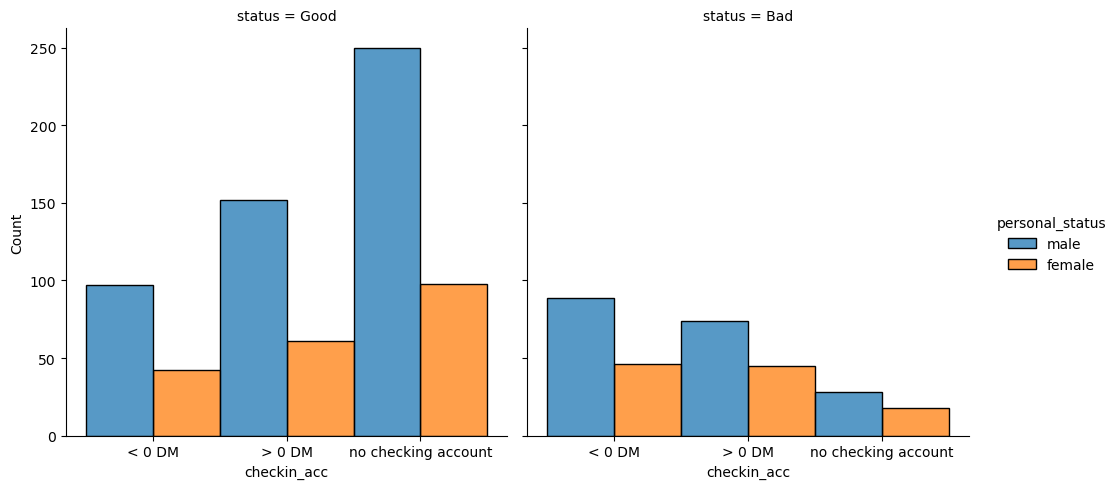

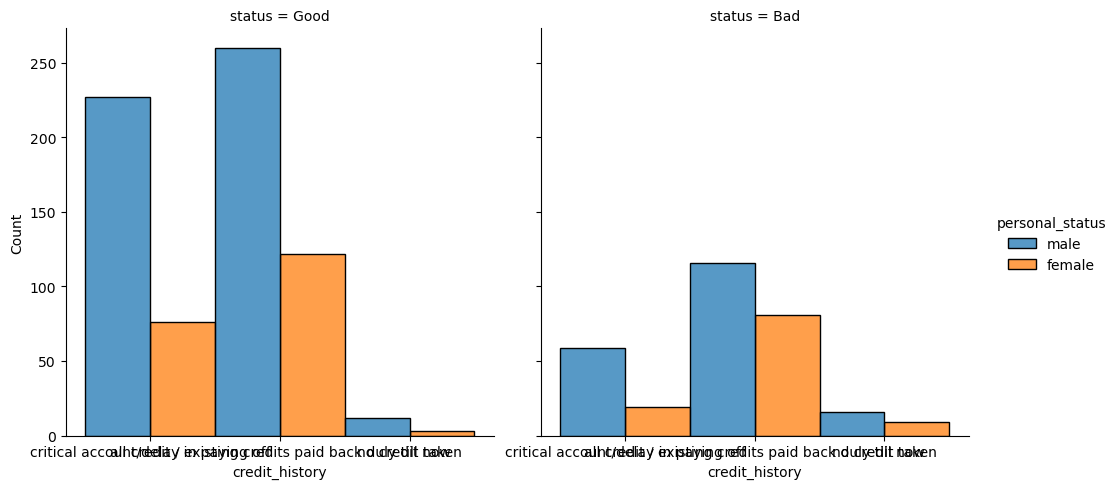

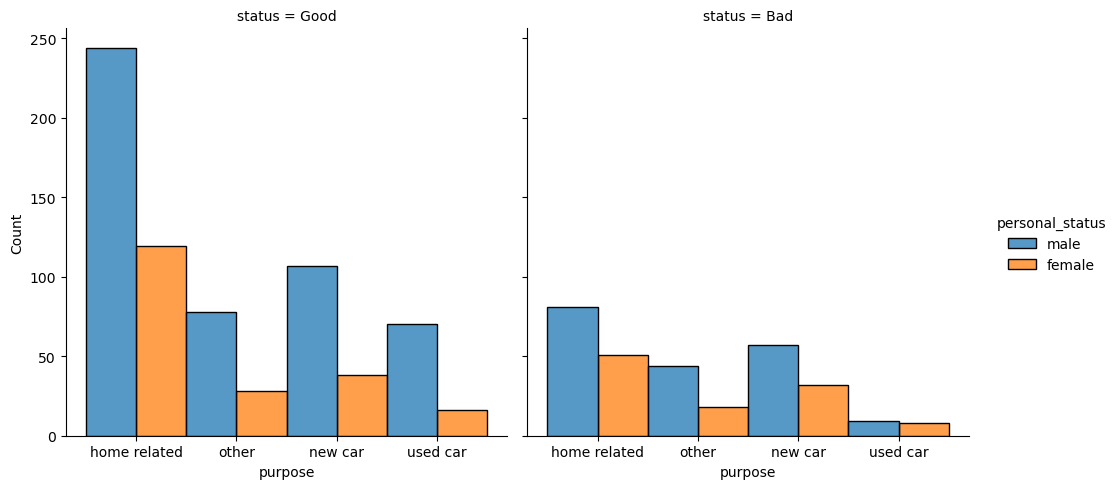

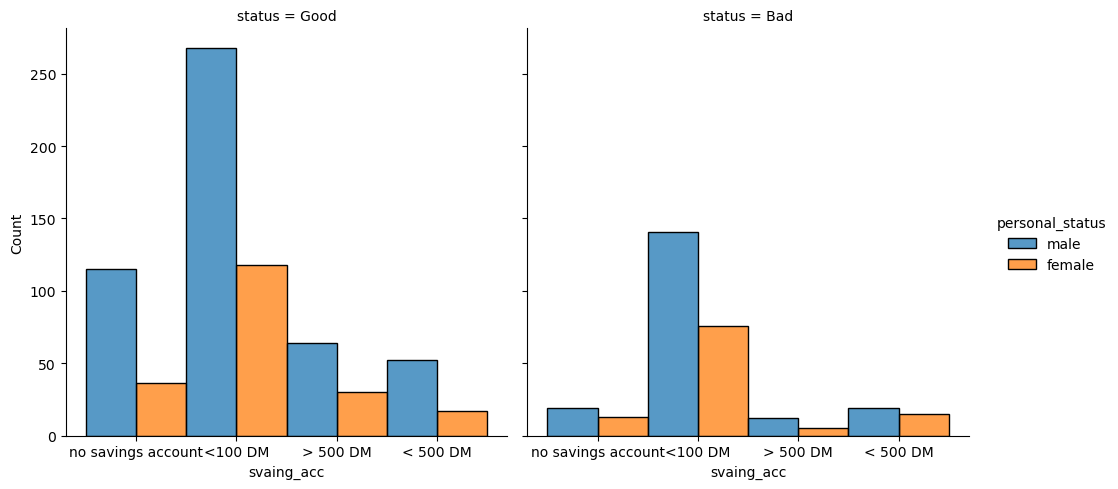

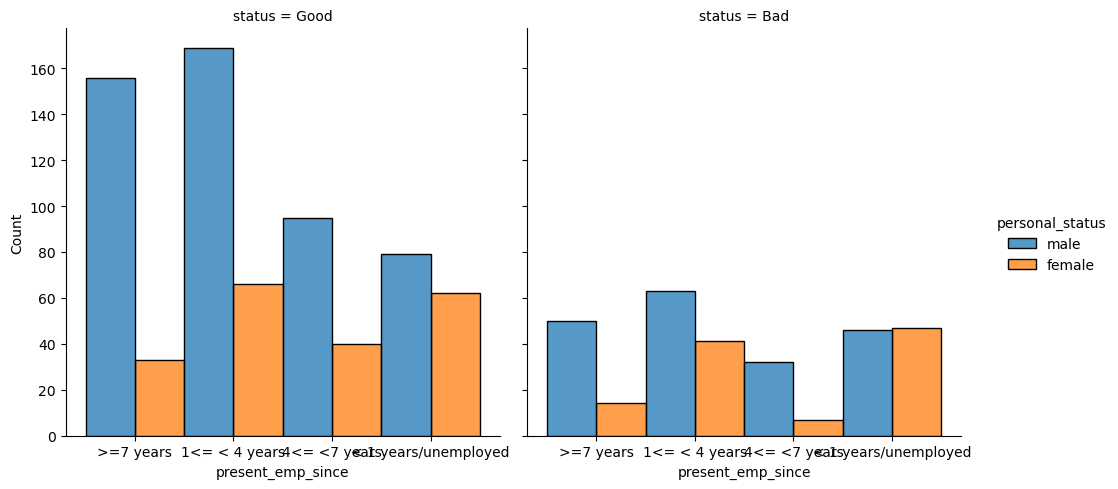

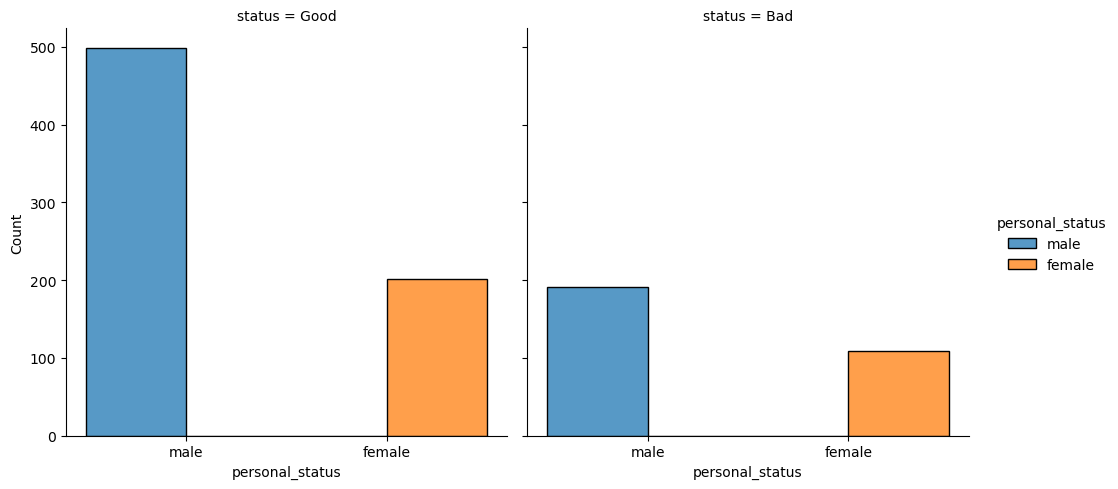

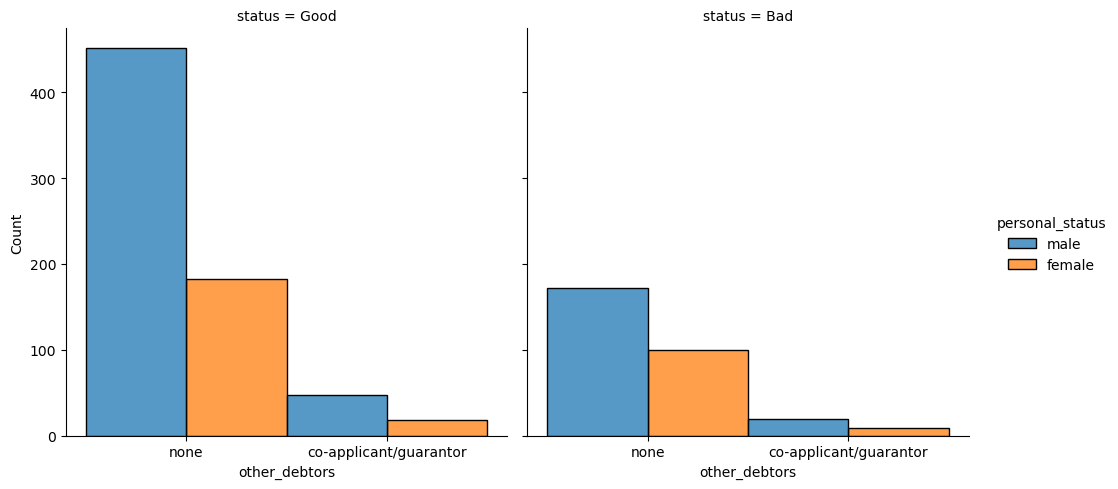

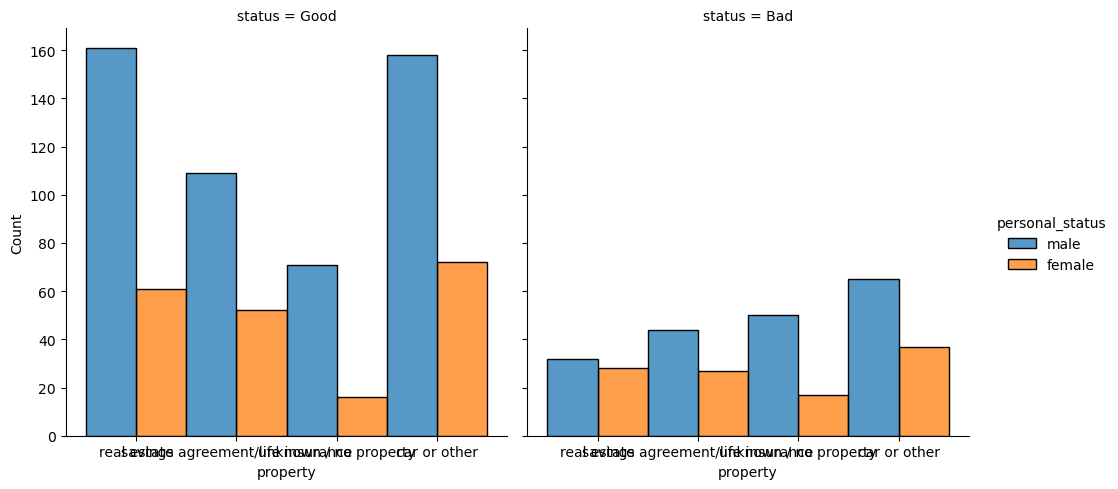

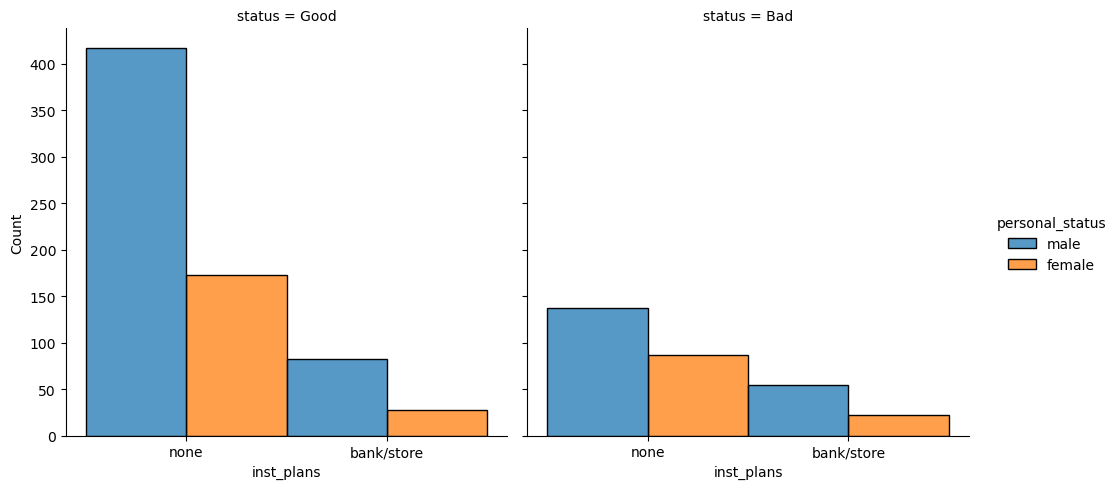

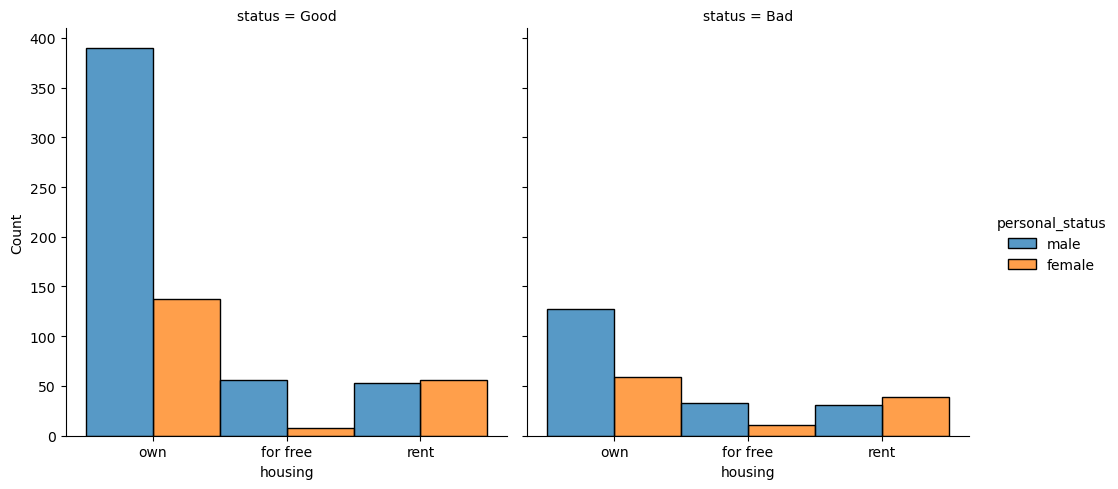

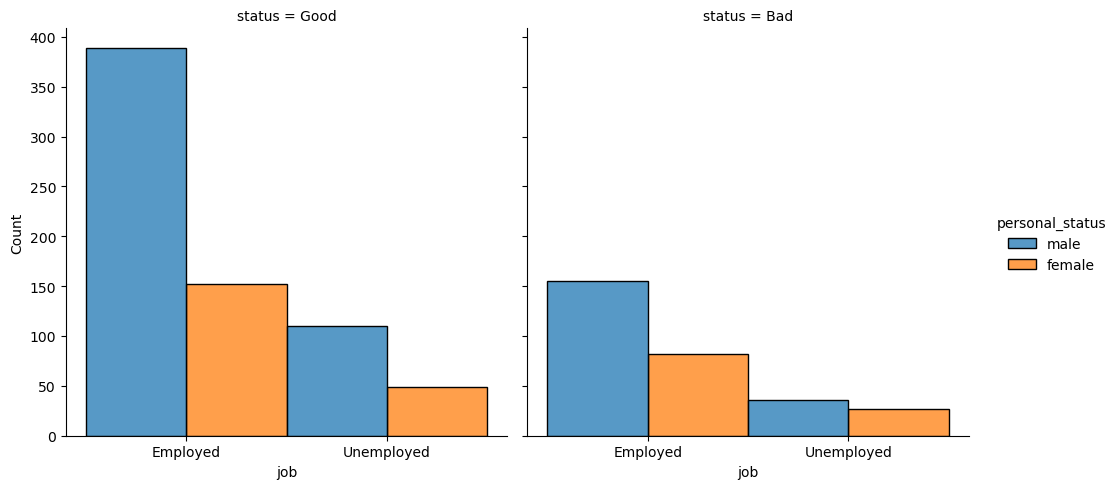

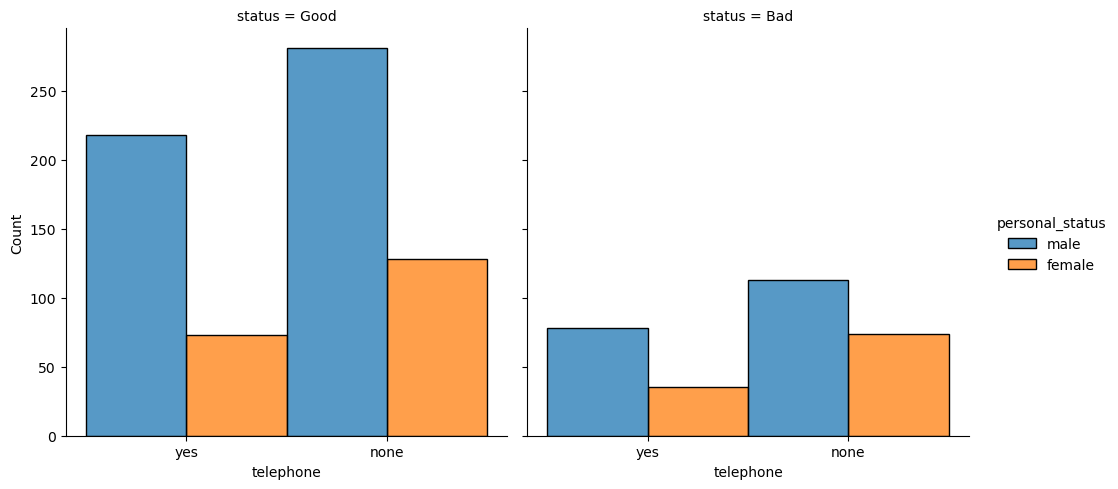

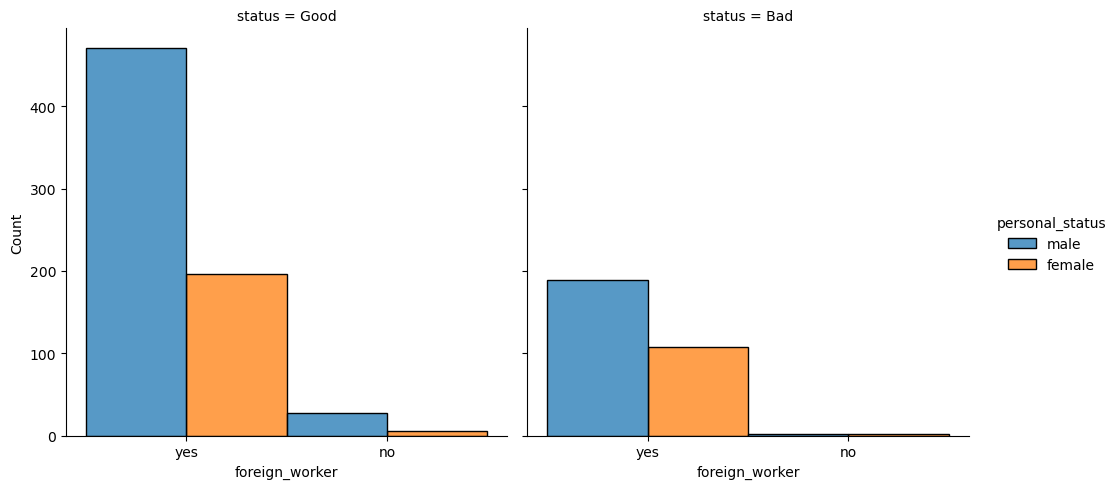

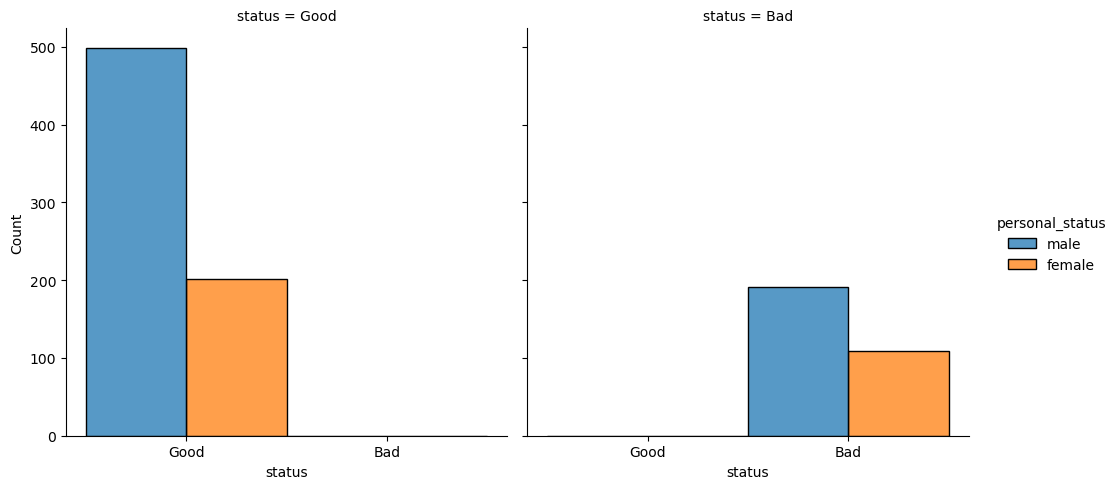

In [46]:
for i in df.select_dtypes(include="object").columns:
    sns.displot(df, x=i,col="status",hue="personal_status",color="red",multiple="dodge")

    

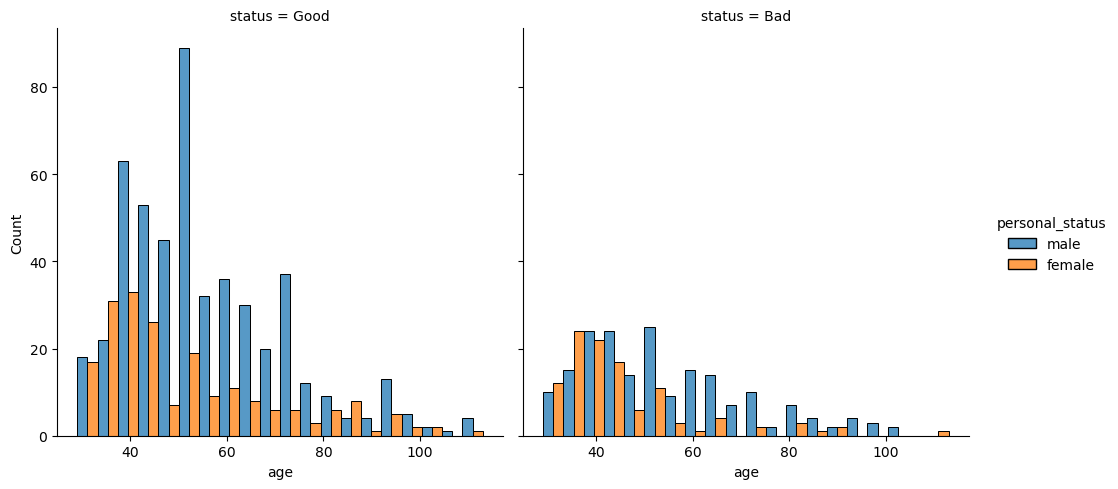

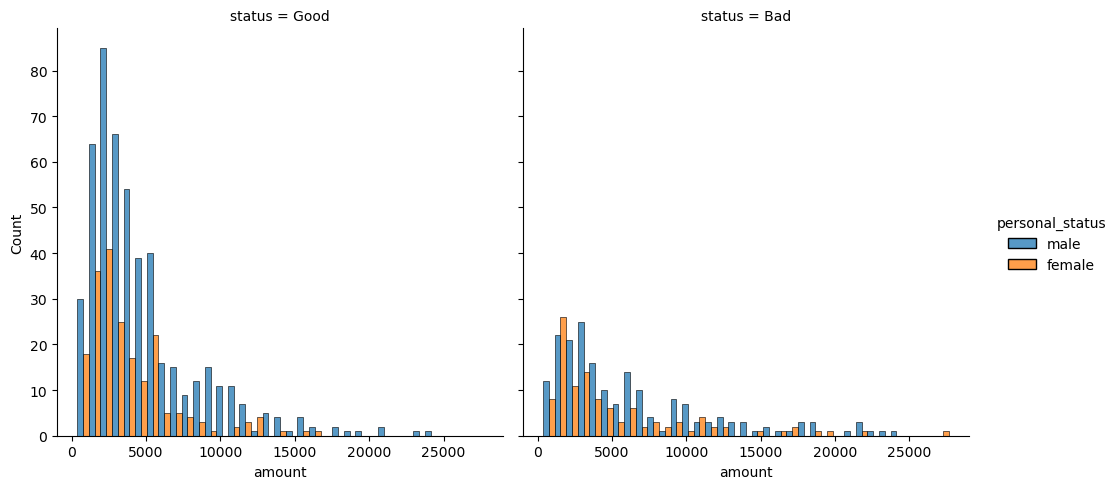

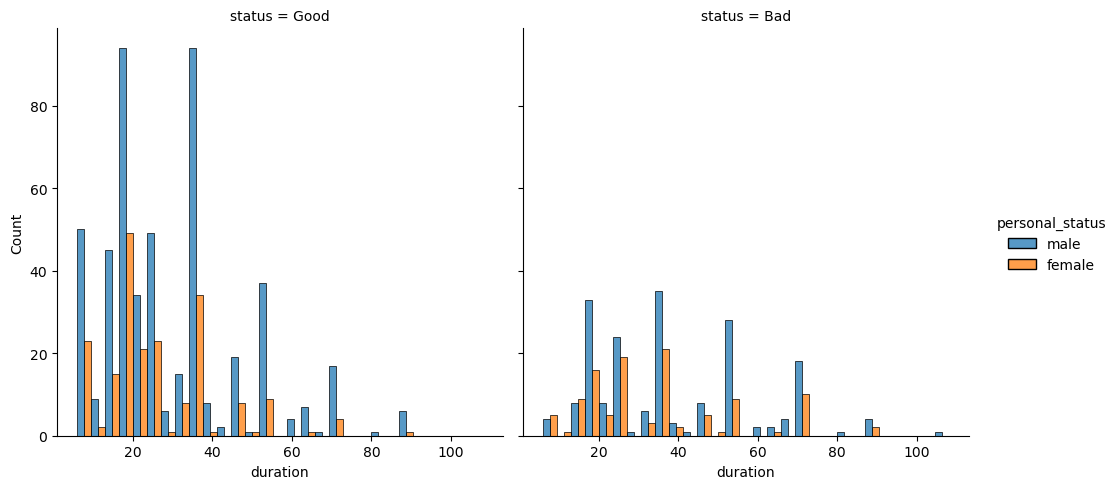

In [47]:
sns.displot(df, x="age", col="status",multiple="dodge",hue="personal_status")
sns.displot(df, x="amount", col="status",multiple="dodge",hue="personal_status")
sns.displot(df, x="duration", col="status",multiple="dodge",hue="personal_status")
plt.show()


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   checkin_acc        1000 non-null   object
 1   duration           1000 non-null   int64 
 2   credit_history     1000 non-null   object
 3   purpose            1000 non-null   object
 4   amount             1000 non-null   int64 
 5   svaing_acc         1000 non-null   object
 6   present_emp_since  1000 non-null   object
 7   inst_rate          1000 non-null   int64 
 8   personal_status    1000 non-null   object
 9   other_debtors      1000 non-null   object
 10  residing_since     1000 non-null   int64 
 11  property           1000 non-null   object
 12  age                1000 non-null   int64 
 13  inst_plans         1000 non-null   object
 14  housing            1000 non-null   object
 15  num_credits        1000 non-null   int64 
 16  job                1000 non-null   object
 

Here we can see that there are colums in object datatype

In [49]:
#To find names of columns in "object" data type
sel_cols=df.select_dtypes(include="object").columns
sel_cols

Index(['checkin_acc', 'credit_history', 'purpose', 'svaing_acc',
       'present_emp_since', 'personal_status', 'other_debtors', 'property',
       'inst_plans', 'housing', 'job', 'telephone', 'foreign_worker',
       'status'],
      dtype='object')

Now we are going to encode object data type into integer datatype to perform modelling 

In [50]:
from sklearn.preprocessing import LabelEncoder
for i in sel_cols:
    df[i]=LabelEncoder().fit_transform(df[i])

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   checkin_acc        1000 non-null   int32
 1   duration           1000 non-null   int64
 2   credit_history     1000 non-null   int32
 3   purpose            1000 non-null   int32
 4   amount             1000 non-null   int64
 5   svaing_acc         1000 non-null   int32
 6   present_emp_since  1000 non-null   int32
 7   inst_rate          1000 non-null   int64
 8   personal_status    1000 non-null   int32
 9   other_debtors      1000 non-null   int32
 10  residing_since     1000 non-null   int64
 11  property           1000 non-null   int32
 12  age                1000 non-null   int64
 13  inst_plans         1000 non-null   int32
 14  housing            1000 non-null   int32
 15  num_credits        1000 non-null   int64
 16  job                1000 non-null   int32
 17  dependents     

In [52]:
#Describing data to know the behaviour of the data
df.describe()

,checkin_acc,duration,credit_history,purpose,amount,svaing_acc,present_emp_since,inst_rate,personal_status,other_debtors,...,property,age,inst_plans,housing,num_credits,job,dependents,telephone,foreign_worker,status
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.12000,31.449000,0.461000,0.879000,4907.134000,1.374000,1.401000,4.606000,0.690000,0.907000,...,1.208000,53.566000,0.814000,1.071000,1.367000,0.222000,2.155000,0.404000,0.963000,0.700000
std,0.80886,18.055564,0.573418,1.030253,4234.100176,0.898293,1.193995,1.572016,0.462725,0.290578,...,1.066712,17.065664,0.389301,0.531264,0.482228,0.415799,0.362086,0.490943,0.188856,0.458487
min,0.00000,6.000000,0.000000,0.000000,375.000000,0.000000,0.000000,2.000000,0.000000,0.000000,...,0.000000,29.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,0.00000,18.000000,0.000000,0.000000,2048.250000,1.000000,0.000000,3.000000,0.000000,1.000000,...,0.000000,41.000000,1.000000,1.000000,1.000000,0.000000,2.000000,0.000000,1.000000,0.000000
50%,1.00000,27.000000,0.000000,1.000000,3479.500000,1.000000,1.000000,5.000000,1.000000,1.000000,...,1.000000,50.000000,1.000000,1.000000,1.000000,0.000000,2.000000,0.000000,1.000000,1.000000
75%,2.00000,36.000000,1.000000,2.000000,5958.500000,2.000000,3.000000,6.000000,1.000000,1.000000,...,2.000000,63.000000,1.000000,1.000000,2.000000,0.000000,2.000000,1.000000,1.000000,1.000000
max,2.00000,108.000000,2.000000,3.000000,27636.000000,3.000000,3.000000,6.000000,1.000000,1.000000,...,3.000000,113.000000,1.000000,2.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000


In [53]:
#here we are finding upper and lower bound to the age to filter the outliers from the data
Q1_age=np.percentile(df["age"],25)
Q3_age=np.percentile(df["age"],75)
IQR_age=Q3_age-Q1_age
lower_bound_age=Q1_age-(1.5*IQR_age) #minimum age criteria, Ages below lower_bound  consider as outliers 
upper_bound_age=Q3_age+(1.5*IQR_age) #maximum age criteria, Ages above upper_bound  consider as outliers 
print(lower_bound_age,upper_bound_age,Q1_age,Q3_age,IQR_age)




8.0 96.0 41.0 63.0 22.0


In [54]:
#Filtering age factor removing outliers
df=df[df["age"]<=upper_bound_age]

In [55]:
df.describe()

,checkin_acc,duration,credit_history,purpose,amount,svaing_acc,present_emp_since,inst_rate,personal_status,other_debtors,...,property,age,inst_plans,housing,num_credits,job,dependents,telephone,foreign_worker,status
count,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000,...,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000
mean,1.125896,31.660184,0.459570,0.874104,4909.292733,1.371546,1.394063,4.607984,0.688843,0.905834,...,1.201638,52.402252,0.813715,1.078813,1.362334,0.219038,2.156602,0.402252,0.963153,0.699079
std,0.809469,18.101636,0.574967,1.030038,4218.813199,0.900893,1.193942,1.570364,0.463204,0.292209,...,1.064169,15.442149,0.389536,0.528813,0.480921,0.413806,0.363611,0.490603,0.188484,0.458893
min,0.000000,6.000000,0.000000,0.000000,375.000000,0.000000,0.000000,2.000000,0.000000,0.000000,...,0.000000,29.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,0.000000,0.000000,2061.000000,1.000000,0.000000,3.000000,0.000000,1.000000,...,0.000000,41.000000,1.000000,1.000000,1.000000,0.000000,2.000000,0.000000,1.000000,0.000000
50%,1.000000,27.000000,0.000000,1.000000,3485.000000,1.000000,1.000000,5.000000,1.000000,1.000000,...,1.000000,50.000000,1.000000,1.000000,1.000000,0.000000,2.000000,0.000000,1.000000,1.000000
75%,2.000000,36.000000,1.000000,2.000000,5958.000000,2.000000,3.000000,6.000000,1.000000,1.000000,...,2.000000,62.000000,1.000000,1.000000,2.000000,0.000000,2.000000,1.000000,1.000000,1.000000
max,2.000000,108.000000,2.000000,3.000000,27636.000000,3.000000,3.000000,6.000000,1.000000,1.000000,...,3.000000,96.000000,1.000000,2.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000


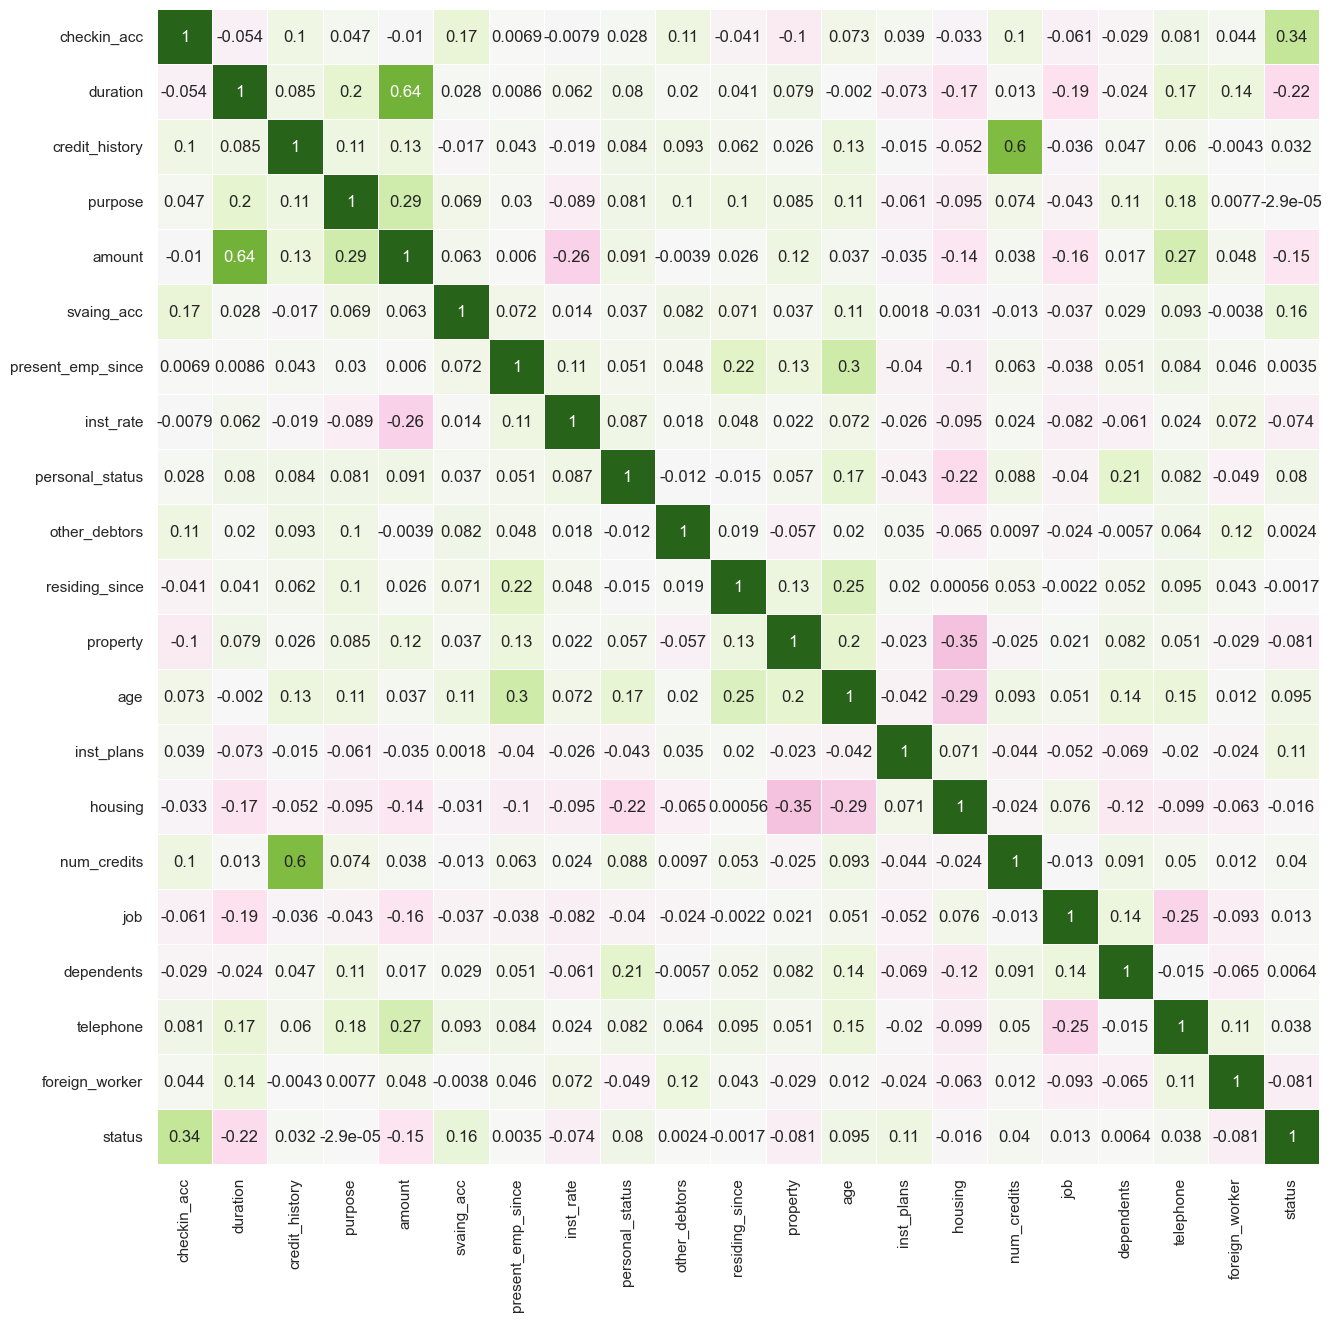

In [56]:
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(15,15)})
sns.heatmap(df.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="PiYG")
plt.show()


SO THERE IS NOT SUFFICIENT MULTICOLINEARITY

# Feature Selection 

In [74]:
cat_attributes=['checkin_acc', 'credit_history', 'purpose', 'svaing_acc',
       'present_emp_since', 'personal_status', 'other_debtors', 'property',
       'inst_plans', 'housing', 'job', 'telephone', 'foreign_worker','dependents','num_credits','residing_since']

In [75]:
from scipy import stats

In [76]:
statistical_significance=[]
for attr in cat_attributes:
    data_count=pd.crosstab(df[attr],df["status"]).reset_index()
    obs=np.asarray(data_count[[0,1]])
    chi2, p, dof, expected = stats.chi2_contingency(obs)
    statistical_significance.append([attr,round(p,6)])
statistical_significance=pd.DataFrame(statistical_significance)
statistical_significance.columns=["Attribute","P-value"]
print(statistical_significance)


            Attribute   P-value
0         checkin_acc  0.000000
1      credit_history  0.000000
2             purpose  0.000030
3          svaing_acc  0.000000
4   present_emp_since  0.000109
5     personal_status  0.015793
6       other_debtors  1.000000
7            property  0.000041
8          inst_plans  0.000791
9             housing  0.000145
10                job  0.749004
11          telephone  0.269526
12     foreign_worker  0.019030
13         dependents  0.917309
14        num_credits  0.244138
15     residing_since  0.870683


In [77]:
num_attributes=["age","duration","amount"]

In [78]:
good_df=df[df["status"]==1]
bad_df=df[df["status"]==0]

In [79]:
statistical_significance=[]
for attr in num_attributes:
    statistic, p=stats.f_oneway(good_df[attr].values,bad_df[attr].values)
    statistical_significance.append([attr,round(p,6)])
statistical_significance=pd.DataFrame(statistical_significance)
statistical_significance.columns=["Attribute","P-value"]
print(statistical_significance)

  Attribute   P-value
0       age  0.002946
1  duration  0.000000
2    amount  0.000003


In [81]:
features_selected=['checkin_acc', 'duration', 'credit_history', 'purpose', 'amount','svaing_acc', 'present_emp_since', 'inst_rate', 'personal_status', 'property', 'age', 'inst_plans','housing','foreign_worker']

# Model Fitting

In [82]:
#DEFINING EXPLAINED AND EXPLLAINATORY VARIABLE
x=df[features_selected]
y=df["status"]

In [83]:
#HERE WE ARE SPLITING DATA INTO TRAIN AND TEST DATA
from sklearn.model_selection import train_test_split

In [84]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=21)

In [85]:
from sklearn.linear_model import LogisticRegression

In [86]:
#here we are using logistic Regression 
log_reg=LogisticRegression().fit(x_train,y_train)

C:\Users\91879\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [87]:
y_predict=log_reg.predict(x_test)

In [88]:
y_predict

array([0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0])

True Positive – A fake classified as fake.
False Positive – A real classified as fake.
False Negative – A fake classified as not fake.
True Negative – A real classified as not fake.

Sensitivity/Recall = Number of fake correctly predicted as fake / Total number of fake

In [89]:
#HERE WE ARE DETERMINING RECALL/SENSTIVITY SCORE
from sklearn.metrics import recall_score
recall_score_=recall_score(y_test,y_predict)

In [90]:
recall_score_

0.9219858156028369

Precision = True Positive/ (True positive + False Positive)

In [91]:
#HERE WE ARE DETERMINING PRECISION SCORE
from sklearn.metrics import precision_score
precision_score_=precision_score(y_test,y_predict)
precision_score_

0.7975460122699386

Accuracy = (True Positives + True Negatives)/(True Positives + True Negatives + False Positives + False Negatives)

In [92]:
#HERE WE ARE DETERMINING ACCURACY
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_predict)

In [93]:
accuracy

0.7755102040816326

In [94]:
#CONFUSION MATRIX
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predict, labels=None, sample_weight=None, normalize=None)

array([[ 22,  33],
       [ 11, 130]], dtype=int64)

In [95]:
#classification matrics

from sklearn.metrics import classification_report
classi_report=classification_report(y_test,y_predict,labels=[0,1])

In [96]:
print(classi_report)

              precision    recall  f1-score   support

           0       0.67      0.40      0.50        55
           1       0.80      0.92      0.86       141

    accuracy                           0.78       196
   macro avg       0.73      0.66      0.68       196
weighted avg       0.76      0.78      0.76       196

